In [1]:
from diffusers.pipelines import BlipDiffusionPipeline
from diffusers.utils import load_image
import torch

blip_diffusion_pipe = BlipDiffusionPipeline.from_pretrained(
    "Salesforce/blipdiffusion", torch_dtype=torch.float16
).to("cuda")

model_index.json:   0%|          | 0.00/682 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/419 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

qformer/config.json:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/media/mountHDD2/git/hfs/.env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

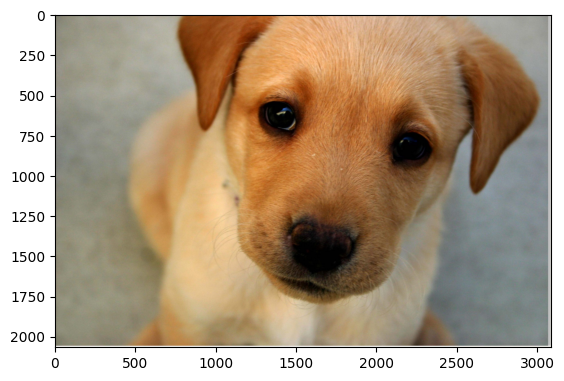

In [2]:
cond_subject = "dog"
tgt_subject = "dog"
text_prompt_input = "swimming underwater"

cond_image = load_image(
    "https://huggingface.co/datasets/ayushtues/blipdiffusion_images/resolve/main/dog.jpg"
)

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.array(cond_image))

  0%|          | 0/26 [00:00<?, ?it/s]

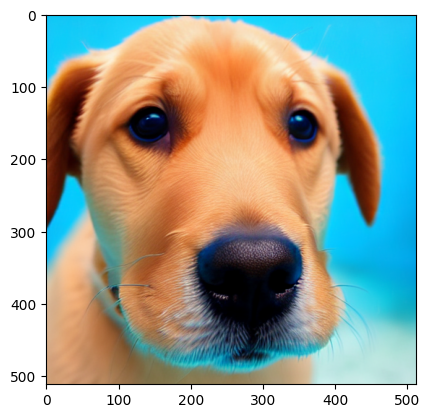

In [4]:
guidance_scale = 7.5
num_inference_steps = 25
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, \
out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

output = blip_diffusion_pipe(
    text_prompt_input,
    cond_image,
    cond_subject,
    tgt_subject,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    neg_prompt=negative_prompt,
    height=512,
    width=512,
).images[0]

plt.imshow(np.array(output))